In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
inputs = keras.Input(shape=(784,))
inputs2 = keras.Input(shape=(10,))

In [17]:
#img_inputs = keras.Input(shape=(32, 32, 3))

In [18]:
in1_feature = layers.Dense(64, activation="relu")
in2_feature = layers.Dense(32, activation="relu")

in1_feature = in1_feature(inputs)
in2_feature = in2_feature(inputs2)

x = layers.concatenate([in1_feature, in2_feature])

x = layers.Dense(64, activation="relu",name="test")(x)
outputs = layers.Dense(10)(x)

In [19]:
model = keras.Model(inputs=[inputs, inputs2 ], outputs=outputs, name="mnist_model")

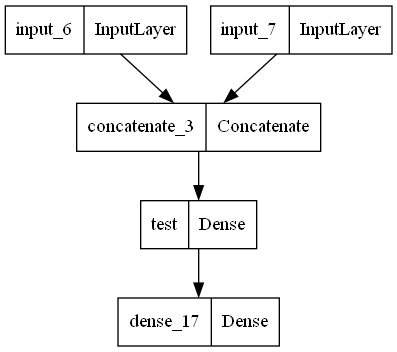

In [20]:
keras.utils.plot_model(model, "my_first_model.png")

In [6]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


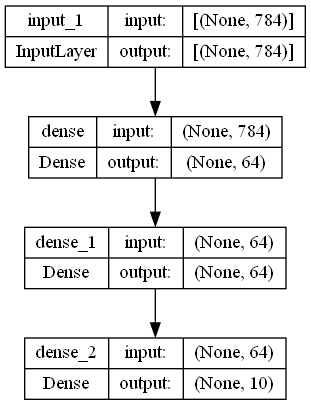

In [7]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 4s 3ms/step - loss: 0.3344 - accuracy: 0.9050 - val_loss: 0.1903 - val_accuracy: 0.9444
Epoch 2/2
750/750 [==============================] - 2s 2ms/step - loss: 0.1594 - accuracy: 0.9526 - val_loss: 0.1350 - val_accuracy: 0.9607
313/313 - 0s - loss: 0.1338 - accuracy: 0.9579 - 393ms/epoch - 1ms/step
Test loss: 0.13383595645427704
Test accuracy: 0.9578999876976013
